Statistical Inferences
===

<big><b><div class="alert alert-success">
Bernoulli and Binomial Distributions
</div></b></big>

<div class="alert alert-warning">
- i.i.d.r.v.'s '$\{X_1,\cdots,X_n\}\sim X$, where $X$ Bernoulli($p$):<br>
    $\mu=p$, $\sigma^2=p(1-p)$

- $Y=X_1+\cdots+X_n$ Binomial:<br>
    $\mu=np$, $\sigma^2=np(1-p)$

Motivation
---
How do we decide whether the penny is fair? 

- Toss a penny 100 times and got 32 "Head". Let $X_i$ be the i.i.d.r.v. defined as follows:
$$X_i=\cases{1,\hbox{ with probability $p$ if Head,}\\
             0, \hbox{ with probabiliy $(1-p)$ if Tail,}}$$
   Then 
   $$ Y=X_1+\cdots+X_{100}$$
   and distribted as Bionomial(100,p).

- the experiment here is
   $$ y=x_1+\cdots+x_{100}=32$$
   and note that $p$ is *unknown*.

Question 1
---
What is the $p$ in this experiment?

Experiment got $32/100=0.32$.

Question 2
---
Is $p = 0.5$? Specifically, is the evidence that $p\ne 0.5$. 

Definitely not. But only one experiment taken. Could we rely on the result and satisfy about it? Theirfore we have to make some hypothesis testing: $p\ne0.5$

i.e. maybe $p=0.5$ is right, but we got $\hat p=0.32$ by accident.

Let's estimate the probability of $\hat p=0.32$ considered to be different from the true vale $p=0.5$:

If $Y\sim$  Binomial($n = 100;p = 0.5$), then the probability that $Y$ will deviate from its expected value by at least $|50−32| = 18$ is:

\begin{eqnarray}
{\cal P} &=& {\cal P}(|Y−50|≥18)\\
         &=& {\cal P} (Y\le32 \hbox{ or }Y\ge68) \\
         &=& {\cal P}(Y \le 32) + {\cal P}(Y \ge68)\\
         &=& {\cal P}(Y \le 32)+1−P(Y \le 67)
         &=& 0.00040877716742671
\end{eqnarray}


In [1]:
answer <- function(arg1,arg2){
    cat(sprintf(arg1,arg2))
}

In [2]:
pbinom(32,100,.5)+1-pbinom(67,100,.5)

[1] 0.0004087772

This gives that
$${\cal P}(p\ne0.5|p=0.5)<<1$$
This significance probability seems fairly small—perhaps small enough to convince that in fact $p\ne 0.5$.

<big><b><div class="alert alert-success">
Central Limit Theorem
</div></b></big>
<div class="alert alert-warning">
- $$\frac{N(\mu,\sigma^2)-\mu}{\sigma}\sim N(0,1)$$

- If sample size, $n$, gets large enough and $Y=X_1+\cdots+X_n$, sum of i.i.d.r.v.'s,$X(\mu,\sigma^2)$ :<br>
  $$\frac{Y-n\mu}{\sqrt n\sigma}\sim N(0,1)$$
- sample mean, $\bar Y=Y/n$:
  $$\frac{\bar Y-\mu}{\sigma/\sqrt n}\sim N(0,1)$$

# Question3
---
If $p=0.5$ is un-reasonable, what are plausible values of $p$? 

Suppose that there is a plauiable value, $p_0$, we can estimate as above:
\begin{eqnarray}
{\cal P} &=& {\cal P}(|Y−100p_0|\ge|100p_0-32|)\\
         &=& {\cal P}(Y \le 100p_0-|100p_0-32|)+1−P(Y \le 100p_0+|100p_0-32|)
\end{eqnarray}

We will reject $p_0$ if ${\cal P}<0.1$.

By Central Limit Theorem,

$$\frac{Y−100p_0}{\sqrt{100p_0(1-p_0)}}\sim Z=N(0,1)$$

${\cal P}>0.1$ implies
\begin{eqnarray}
0.1<{\cal P} &=& {\cal P}(|Y−100p_0|\ge|100p_0-32|)\\
         &=& {\cal P} \left( \frac{|Y−100p_0|}{\sqrt{100p_0(1-p_0)}}\ge
              \frac{|100p_0-32|}{\sqrt{100p_0(1-p_0)}} \right)\\
         &=& {\cal P}\left( \left|Z\right|\ge
              \frac{|100p_0-32|}{\sqrt{100p_0(1-p_0)}}\right)\\
\end{eqnarray}


In [ ]:
qnorm(0.95)

In [ ]:
oldpar <- par(mar = c(5, 6, 4, 2) + 0.1) 
options(repr.plot.width=7)
options(repr.plot.height=4)
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 

fx <-dnorm(x)
plot(x, fx, type = "l", col='red',lwd = 2,xlab="",main="Z~N(0,1)",
        ylab=expression(frac(1,sqrt(2*pi))* e^{-x^2/2})) 

x0 <- x[x >= 1.645]    # define region to fill
x0 <- c(x0[1], x0) ;  fx0 <- fx[x >= 1.645]
fx0 <- c(0, fx0)
text(3,0.09,"P(X > 1.645)=0.05")
polygon(x0, fx0, col="gray")

y0 <- x[x <= -1.645]    # define region to fill
y0 <- c( y0,y0[length(y0)]) ;  fy0 <- fx[x <= -1.645]
fy0 <- c(fy0,0)
text(-3,0.09,"P(X < -1.645)=0.05")
polygon(y0, fy0, col="gray")

abline(h=0, col="gray") ; 
abline(v=0, col="gray")


Since 
$$ {\cal P}(Z\le1.645)=0.95$$
then we have to solve $p_0$ by
$$\frac{100p_0-32}{\sqrt{100p_0(1-p_0)}}=\pm1.645$$

In [ ]:
p0<-0.781727700395374
(100*p0-32)/sqrt(100*p0*(1-p0))

This can be solved by Python as follows:
```python
import scipy.optimize as op
from numpy import sqrt
def f(p):
    return (100*p-32)/sqrt(100*p*(1-p))-C
C=-1.645000
op.fsolve(f,0.1)  
# array([ 0.24887644])
C=1.645000
op.fsolve(f,0.1)
# array([ 0.40060858])
```
which gives the solution for $p_0\in[0.2489,0.401]$. 

Note
---
1.  $p=1/2$ is not in the interval; this also shows the reason why it's not plausible. 
2. if run on Jupyter notebook, just create a new Python code to run above to get the values. 
   <a href="python/p_solve.ipynb">p_solve</a>

In [6]:
#Find the root of a x^2+b x+c=0
a<- (1.645)^2*100+10000
b<- -6400-(1.645)^2*100
c<- 32^2
x0<- (-b+sqrt(b^2-4*a*c))/(2*a)
x1<- (-b-sqrt(b^2-4*a*c))/(2*a)   
cat(sprintf("p0 in [%.3f,%.3f], 90%% confident interval",x1,x0))

p0 in [0.249,0.401], 90% confident interval

Cholesterol level in U.S. males 20-74 years old
---
The serum cholesterol levels for all 20-74 year-old US males has mean $\mu$ = 211 mg/100 ml and the standard deviation is $\sigma$ = 46 mg/100 ml. 

Let’s  consider a sample size of size $n$ = 25. The probability of sample mean is larger than  217 mg/100 ml is:

\begin{eqnarray}
{\cal P}(\bar X_n\ge 217) &=&  {\cal P} \left( \frac{\bar X_n-\mu}{\sigma/\sqrt{n}}\ge
              \frac{217-211}{45/\sqrt{25}} \right)\\
         &=& {\cal P}\left( Z\ge0.65 \right)=0.258\\
\end{eqnarray}

R-codes
---
```
ans1<-pnorm(p, mean =0 , sd = 1)
```
represents ${\cal P}( Z\le p )$

```
ans2<-pnorm(p, mean =0 , sd = 1, lower.tail=F)
```
represents ${\cal P}( Z\ge p )$

```
x<-qnorm(p, mean =0 , sd = 1)
```
represents the $ {\color{red} x}$-value such that 
$$p=\int_{-\infty}^{\color{red} x}\frac{1}{\sqrt{2\pi}\sigma}\exp(-t^2/2\sigma^2)d t$$



In [ ]:
pnorm(0.65,lower.tail=F)

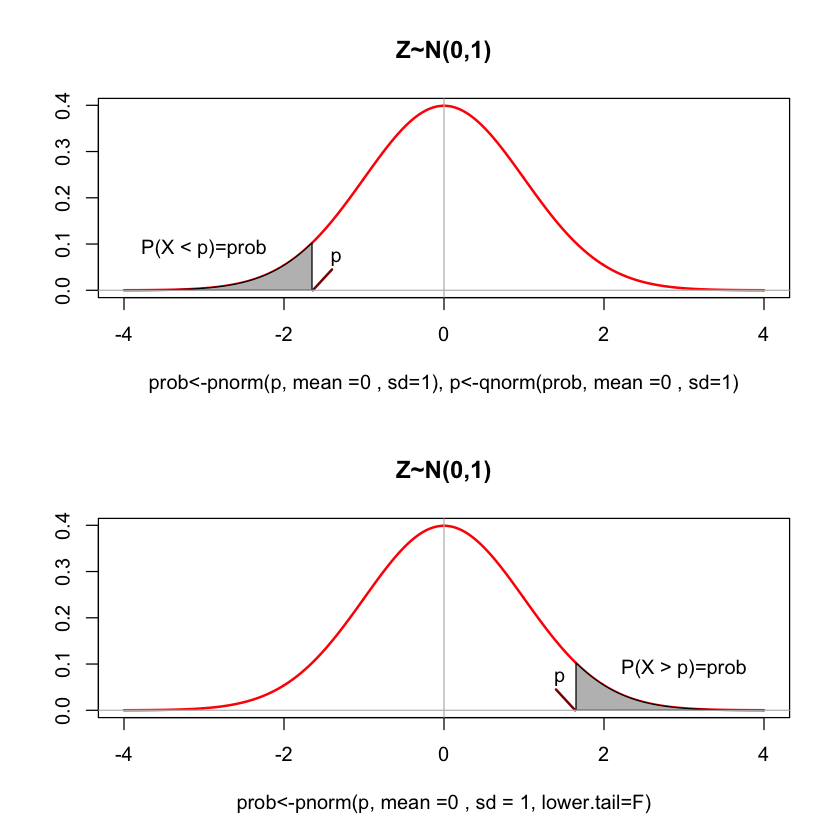

In [7]:
old.par <- par(mfrow=c(2, 1))
mar = c(5, 6, 4, 2) + 0.1
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 
fx <-dnorm(x)

plot(x, fx, type = "l", col='red',lwd = 2,xlab="prob<-pnorm(p, mean =0 , sd=1), p<-qnorm(prob, mean =0 , sd=1)",main="Z~N(0,1)",
        ylab="") 

y0 <- x[x <= -1.645]    # define region to fill
y0 <- c( y0,y0[length(y0)]) ;  fy0 <- fx[x <= -1.645]
fy0 <- c(fy0,0)
text(-3,0.09,"P(X < p)=prob")
text(-1.345,0.07,"p")
lines(c(-1.40, -1.64), c(.045, .0), col = "red4", lwd = 2)
polygon(y0, fy0, col="gray")
abline(h=0, col="gray") ; 
abline(v=0, col="gray")

plot(x, fx, type = "l", col='red',lwd = 2,xlab="prob<-pnorm(p, mean =0 , sd = 1, lower.tail=F)",main="Z~N(0,1)",
        ylab="") 
x0 <- x[x >= 1.645]    # define region to fill
x0 <- c(x0[1], x0) ;  fx0 <- fx[x >= 1.645]
fx0 <- c(0, fx0)
text(3,0.09,"P(X > p)=prob")
text(1.45,0.07,"p")
lines(c(1.40, 1.64), c(.045, .0), col = "red4", lwd = 2)
polygon(x0, fx0, col="gray")
abline(h=0, col="gray") ; 
abline(v=0, col="gray")

par(old.par)

In [8]:
ans1<-pnorm(0.65, mean =0 , sd = 1, lower.tail=F)
#pnorm(217, mean =211 , sd = 45/5, lower.tail=F)
arg1 <- "probability of serum cholesterol levels greater than 217 is %.3f."

answer(arg1,ans1)

probability of serum cholesterol levels greater than 217 is 0.258.

Similarly, we have:
- ${\cal P}(\bar X_n\ge 220)={\cal P}( Z\ge0.98)=0.164$;
- ${\cal P}(\bar X_n\ge 230)={\cal P}( Z\ge2.07)=0.019$;



In [9]:
ans2<-pnorm(0.98, mean =0 , sd = 1, lower.tail=F)
ans3<-pnorm(2.07, mean =0 , sd = 1, lower.tail=F)
arg2 <- "probability of serum cholesterol levels greater than 220 is %.3f.\n"
arg3 <- "probability of serum cholesterol levels greater than 230 is %.3f."
answer(arg2,ans2)
answer(arg3,ans3)

probability of serum cholesterol levels greater than 220 is 0.164.
probability of serum cholesterol levels greater than 230 is 0.019.

In [10]:
ans2<-pnorm(1, mean =0 , sd = 1)
ans3<-pnorm(0.98, mean =0 , sd = 1, lower.tail=F)
arg2 <- "probability of serum cholesterol levels greater than 220 is %.3f.\n"
arg3 <- "probability of serum cholesterol levels greater than 230 is %.3f."
answer(arg2,ans2)
answer(arg3,ans3)

probability of serum cholesterol levels greater than 220 is 0.841.
probability of serum cholesterol levels greater than 230 is 0.164.

To calculate the upper and lower cutoff points enclosing the middle 95% of the means of samples of size n = 25 drawn from this population we work as follows:
$$ {\cal P}(-1.96\le Z\le 1.96)=0.95$$

The cutoff points in the standard normal distribution are −1.96 and +1.96. 

\begin{eqnarray}
0.95={\cal P}(-1.96\le Z\le 1.96) &=&  {\cal P} \left( 
             -1.96\le  \frac{\bar X_n-211}{45/\sqrt{25}}\le 1.96 \right)\\
         &=& {\cal P}\left( 193\le \bar X_n\le 229 \right)\\
\end{eqnarray}


In [11]:
p1<-qnorm(0.975,mean=211,sd=9)
p0<-qnorm(0.025,mean=211,sd=9)
cat(sprintf("Approximately 95%% of the sample means will fall between %d and %d mg/100 ml",round(p0),round(p1)))

Approximately 95% of the sample means will fall between 193 and 229 mg/100 ml

Level of glucose in the blood
---
Generally, it is known that in the general population the level of glucose in the blood has mean $\mu$ = 9.7 mmol/L and standard deviation $\sigma$ = 2.0 mmol/L.

In a group of $n$ = 64 diabetic patients the average level of glucose is $\bar X_{64}$ = 13.6 mmol/L.
Assuming that diabetic patients do not have higher glucose levels in their blood compared to the rest of the population, what is the probability ${\cal P}(\bar X_{64} > 13.6)$ if $\bar X_{diabetic} = \bar X_{healthy}$?

\begin{eqnarray}
{\cal P}(\bar X_n>13.6) &=&  {\cal P} \left( \frac{\bar X_n-\mu}{\sigma/\sqrt{n}}\ge
              \frac{13.6-9.7}{2/\sqrt{64}} \right)\\
         &=& {\cal P}\left( Z\ge15.6 \right)\\
\end{eqnarray}
is almost equal to 0, reference the following calculation.

In [12]:
pnorm(15.6,lower.tail=F)

[1] 3.639706e-55